# <center><b>**Autism _Prediction_Model Building**<center><b>

---
# **Table of Contents**
---
**1.** [**Installing & Importing Libraries**](#Section1)<br>
**2.** [**Data Acquisition**](#Section2)<br>
**3.** [**Feature Scaling**](#Section3)<br>
**4.** [**Model Development & Evaluation**](#Section4)<br>

   - **4.1** [**Data Preparation**](#Section4.1)<br>
   - **4.2** [**LogisticRegression**](#Section4.2)<br>
   - **4.3** [**RandomForest Classifier**](#Section4.3)<br>
   - **4.4** [**DecisionTree Classifier**](#Section4.4)<br>
   - **4.5** [**Navie Bayes**](#Section4.5)<br>
   - **4.6** [**Ada Boosting**](#Section4.6)<br>
   - **4.7** [**XG Boost Classifier**](#Section4.7)<br>
   - **4.8** [**Gradient Bosst Classifier**](#Section4.8)<br>

**5** [**Hyperparameter Tuning**](#Section5)<br>
   
   - **5.1** [**RandomizedSearchCV with RandomforestClassifier**](#Section5.1)<br>
   - **5.2** [**GridSearchCV with DecisionTree Classifier**](#Section5.2)<br>

**6** [**Tune Model With Cross Validation**](#Section6)<br>
  - **6.1** [**LogisticRegression**](#Section6.1)<br>
  - **6.2** [**Ada Boosting**](#Section6.2)<br>
  - **6.3** [**XG Boost Classifier**](#Section6.3)<br>
  - **6.4** [**Gradient Bosst Classifier**](#Section6.4)<br>

**7** [**Selecting Best Model**](#Section7)<br>


<a name = Section1></a>
### **1. Installing & Importing Libraries**

In [136]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix,roc_curve,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay ,precision_recall_curve,plot_roc_curve
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore") 

<a name = Section2></a>
### **2. Data Acquisition**

In [137]:
df = pd.read_csv('/content/Toddler Autism dataset July 2018.csv')
df.head(2)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes


In [138]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [140]:
df2=df.copy()

In [141]:
df['Age_Years'] = round(df['Age_Mons']/12,0)

In [142]:
df['Age_Years'].value_counts()

3.0    480
2.0    414
1.0    160
Name: Age_Years, dtype: int64

In [143]:
# to check the perfectness of scoring in Qchat column , added column with sum of all the columns(A1 to A10)
df['new_Qchat_10_score'] = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8','A9', 'A10']].sum(axis =1)

In [144]:
df[['Qchat-10-Score','new_Qchat_10_score']].value_counts().sort_index()

Qchat-10-Score  new_Qchat_10_score
0               0                      54
1               1                      88
2               2                      88
3               3                      96
4               4                     110
5               5                     120
6               6                      96
7               7                     135
8               8                      97
9               9                      95
10              10                     75
dtype: int64

In [145]:
df['Class/ASD Traits '].value_counts()

Yes    728
No     326
Name: Class/ASD Traits , dtype: int64

In [146]:
round(df['Class/ASD Traits '].value_counts()/np.float(len(df)),2)

Yes    0.69
No     0.31
Name: Class/ASD Traits , dtype: float64

**We can see that 69% of data belongs to class Yes and 31% data belongs to class No . Its a clear indication of data imbalance.**






In [147]:
# df = df[df['Age_Years'] <13]

In [148]:
# df.dropna(axis=0, how='any',inplace=True)

In [149]:
df.shape

(1054, 21)

In [150]:
#Intialize empty list for categorical features and their length
cat_features = []
label_len = []

# Identify categorical features
for i in df.columns:
  if (df[i].dtype == object):
    cat_features.append(i)

# Identify labels length per leature
for i in cat_features:
  label_len.append(len(df[i].unique()))

# Display total categorical features
print('Total Categorical Features:', len(cat_features))

# Create and show categorical feature frame
cat_frame = pd.DataFrame(data = {'Length': label_len}, index=cat_features)
cat_frame

Total Categorical Features: 6


,Length
Sex,2
Ethnicity,11
Jaundice,2
Family_mem_with_ASD,2
Who completed the test,5
Class/ASD Traits,2


In [151]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
  if df[i].dtype =='object':
    df[i] = le.fit_transform(df[i])

In [152]:
df.drop(['new_Qchat_10_score','Qchat-10-Score'],axis = 1, inplace = True)

<a name = Section3></a>
### **3.Feature scaling and selection** 

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['Class/ASD Traits '],axis =1))

In [154]:
x = pd.DataFrame(data=X_scaled, columns=df.drop(['Class/ASD Traits '],axis =1).columns)
y= df['Class/ASD Traits ']

In [155]:
from sklearn.feature_selection import SelectFromModel
from yellowbrick.model_selection import FeatureImportances 
from sklearn.ensemble import RandomForestClassifier
selector = SelectFromModel(RandomForestClassifier(n_estimators = 10, random_state = 42))
selector.fit(x, y)

# Extracting list of important features
selected_feat = x.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 7
Threshold set by Model: 0.06
Important Features: ['Case_No', 'A1', 'A2', 'A4', 'A5', 'A7', 'A9']


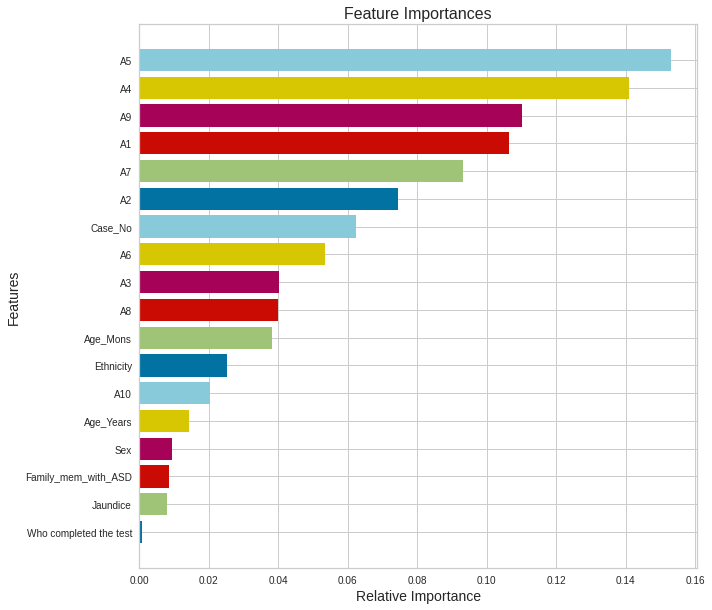

In [156]:
figure = plt.figure(figsize=[10,10])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

<a name = Section4></a>
# **4. Model Development & Evaluation**


- In this section, we will develop Logistic Regression and Stochastic Gradient Descent and compare the performance.

- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**.

- Considering the complexity of data, we can run a **loop** over multiple **classifiers** and estimate the accuracy of the model.

- But in a real-life situation, one must train the model individually as then decide which model is best in which situation.

<a name = Section4.1></a>
### **4.1. Data Preparation**

In [157]:
def model_eval(actual,predicted):
    acc_score = accuracy_score(actual , predicted)
    class_report = classification_report(actual , predicted)
    print('The accuracy of the model is : ' ,acc_score)
    print(confusion_matrix(actual,predicted))
    print(class_report)
    

In [158]:
def confus_matrix(df):
    y_train_pred_count = df.predict(x_train)
    y_test_pred_count = df.predict(x_test)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
    plot_confusion_matrix(estimator=df, X=x_train, y_true=y_train, values_format='.7g', cmap='YlGnBu', ax=ax1)
    plot_confusion_matrix(estimator=df, X=x_test, y_true=y_test, values_format='.7g', cmap='YlGnBu', ax=ax2)
    ax1.set_title(label='Train Data', size=14)
    ax2.set_title(label='Test Data', size=14)
    ax1.grid(b=False)
    ax2.grid(b=False)
    plt.suptitle(t='Confusion Matrix', size=16)
    plt.show()

**Now we will split our data in training and testing part for further development**

In [159]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=365,stratify = y )

In [160]:
print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (843, 18) (843,)
Testing Data Shape: (211, 18) (211,)


<a name = Section4.2></a>
### **4.2. Logistic Regression**

In [161]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_lr_train_pred = logreg.predict(x_train)
y_lr_test_pred = logreg.predict(x_test)

In [162]:
model_eval(y_train,y_lr_train_pred)

The accuracy of the model is :  1.0
[[261   0]
 [  0 582]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       582

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.00       843



In [163]:
model_eval(y_test,y_lr_test_pred)

The accuracy of the model is :  1.0
[[ 65   0]
 [  0 146]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       146

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



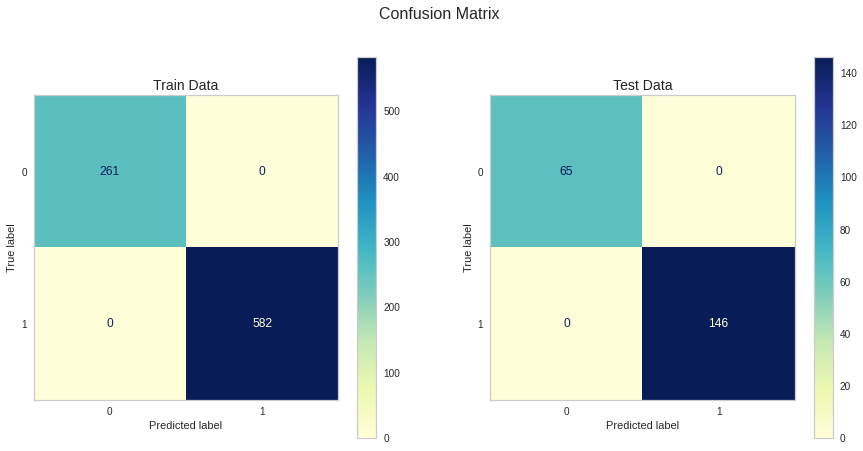

In [164]:
confus_matrix(logreg)

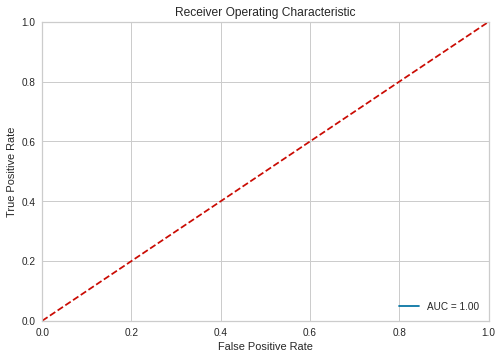

In [165]:
from sklearn import metrics

probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a name = Section4.3></a>
### **4.3. RandomForest Classifier**

In [166]:
rf = RandomForestClassifier(n_estimators=100,max_depth=7,n_jobs=-1)
rf.fit(x_train,y_train)
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [167]:
model_eval(y_train,y_rf_train_pred)

The accuracy of the model is :  0.9976275207591934
[[261   0]
 [  2 580]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       261
           1       1.00      1.00      1.00       582

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.00       843



In [168]:
model_eval(y_test,y_rf_test_pred)

The accuracy of the model is :  0.9715639810426541
[[ 60   5]
 [  1 145]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        65
           1       0.97      0.99      0.98       146

    accuracy                           0.97       211
   macro avg       0.98      0.96      0.97       211
weighted avg       0.97      0.97      0.97       211



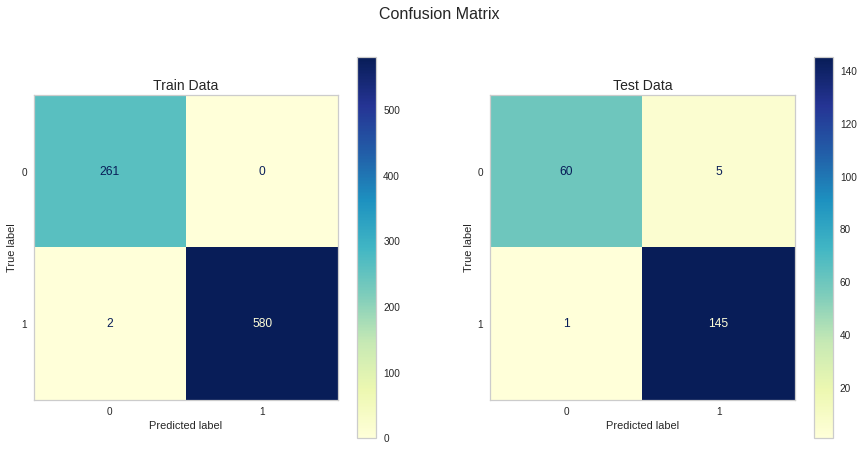

In [169]:
confus_matrix(rf)

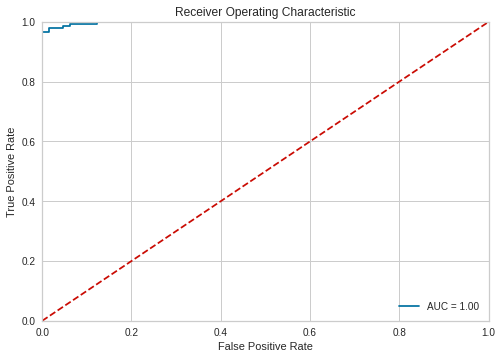

In [170]:
from sklearn import metrics

probs = rf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a name = Section4.4></a>
### **4.4. Decision Tree Classifier**

In [171]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [172]:
model_eval(y_train,preds_dtree_train)

The accuracy of the model is :  1.0
[[261   0]
 [  0 582]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       582

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.00       843



In [173]:
model_eval(y_test,preds_dtree_test)

The accuracy of the model is :  0.943127962085308
[[ 59   6]
 [  6 140]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        65
           1       0.96      0.96      0.96       146

    accuracy                           0.94       211
   macro avg       0.93      0.93      0.93       211
weighted avg       0.94      0.94      0.94       211



<a name = Section4.5</a>
### **4.5. Naive Bayes**

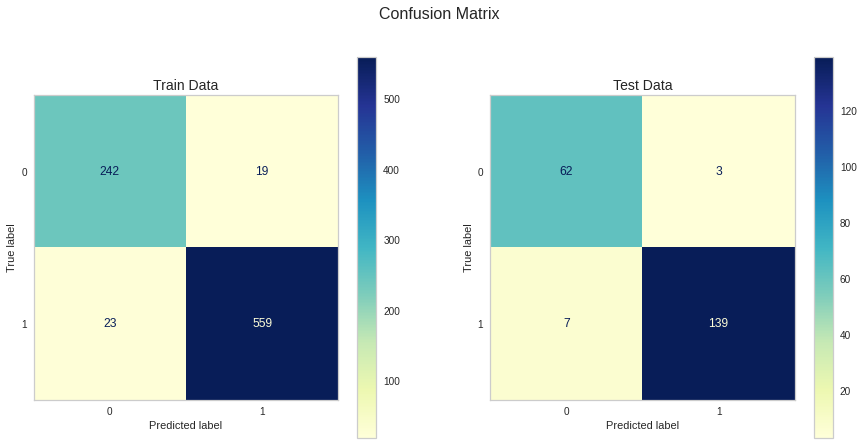

In [174]:
naive = GaussianNB()
naive.fit(x_train, y_train)

y_train_pred_count = naive.predict(x_train)
y_test_pred_count = naive.predict(x_test)

y_train_pred_proba = naive.predict_proba(x_train)
y_test_pred_proba = naive.predict_proba(x_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = naive, X = x_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = naive, X = x_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [175]:
model_eval(y_test,y_test_pred_count)

The accuracy of the model is :  0.95260663507109
[[ 62   3]
 [  7 139]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        65
           1       0.98      0.95      0.97       146

    accuracy                           0.95       211
   macro avg       0.94      0.95      0.95       211
weighted avg       0.95      0.95      0.95       211



<a name = Section4.6></a>
### **4.6 Ada boosting**

In [176]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_ada_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_ada_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  1.0
[[ 65   0]
 [  0 146]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       146

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  1.0
[[261   0]
 [  0 582]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       582

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.0

<a name = Section4.7></a>
### **4.7 XG Boost Classifier**

In [177]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
preds_xgb_train = xgb.predict(x_train)
preds_xgb_test = xgb.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_xgb_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_xgb_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  0.990521327014218
[[ 64   1]
 [  1 145]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.99      0.99      0.99       146

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  1.0
[[261   0]
 [  0 582]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       582

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00     

<a name = Section4.8></a>
### **4.8 GradientBoostingClassifier**

In [178]:
gbc = GradientBoostingClassifier(n_estimators=100,max_depth=7)
gbc.fit(x_train, y_train)
preds_gbc_train = gbc.predict(x_train)
preds_gbc_test = gbc.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_gbc_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_gbc_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  0.9620853080568721
[[ 61   4]
 [  4 142]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        65
           1       0.97      0.97      0.97       146

    accuracy                           0.96       211
   macro avg       0.96      0.96      0.96       211
weighted avg       0.96      0.96      0.96       211

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  1.0
[[261   0]
 [  0 582]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       582

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00    


<a name = Section5></a>
# **5. Hyperparameter Tuning** 

<a name = Section5.1></a>
### **5.1 RandomizedSearchCV With RandomForest**

In [179]:
params = {
    'max_depth':[5,10,20,30],
    'max_leaf_nodes':[16,32,64,128],
    'min_samples_leaf':[10,20,30,40,60,80]
}
rf_search_cv = RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1,random_state=42,
                                                                 class_weight='balanced'),
                                param_distributions=params,
                                 n_jobs = -1,
                                 random_state=42,
                                 scoring='roc_auc'
                                )
rf_search_cv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, 30],
                                        'max_leaf_nodes': [16, 32, 64, 128],
                                        'min_samples_leaf': [10, 20, 30, 40, 60,
                                                             80]},
                   random_state=42, scoring='roc_auc')

In [180]:
y_rscv_train_pred = rf_search_cv.predict(x_train)
y_rscv_test_pred = rf_search_cv.predict(x_test)

In [181]:
model_eval(y_test,y_rscv_test_pred)

The accuracy of the model is :  0.9478672985781991
[[ 64   1]
 [ 10 136]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        65
           1       0.99      0.93      0.96       146

    accuracy                           0.95       211
   macro avg       0.93      0.96      0.94       211
weighted avg       0.95      0.95      0.95       211



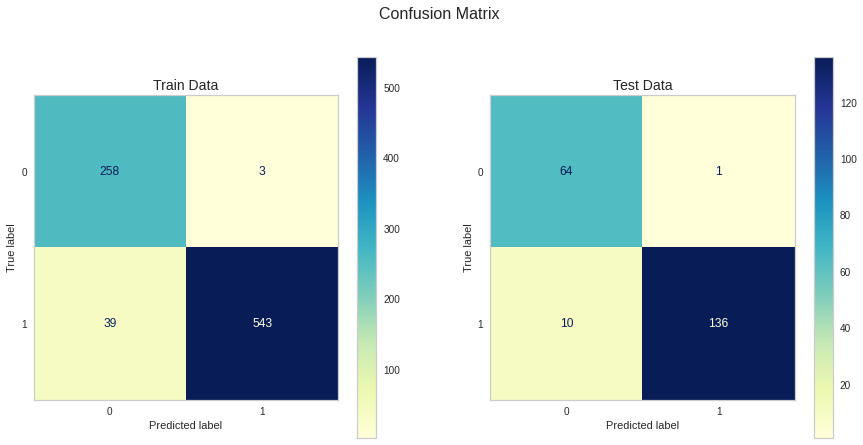

In [182]:
confus_matrix(rf_search_cv)

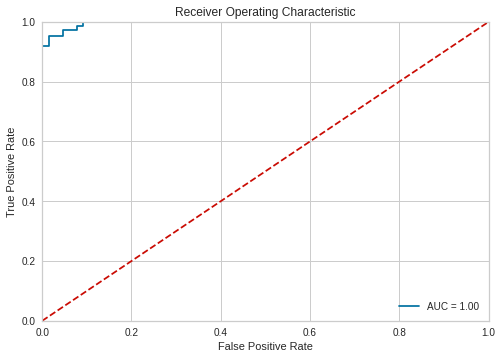

In [183]:
from sklearn import metrics

probs = rf_search_cv.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<a name = Section5.2></a>
### **5.2 GridSearchCV with Decision Tree Classifier**

In [184]:
param_gcv = {'max_depth': [4,8,10],'min_samples_split': [2,5,10],'min_samples_leaf': [1,2,4]}

gcv = GridSearchCV(estimator = dtree,param_grid = param_gcv,cv = 5)

gcv.fit(x_train, y_train)

# Predicting training and testing labels
preds_gcv_train = gcv.predict(x_train)
preds_gcv_test = gcv.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_gcv_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_gcv_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  0.9383886255924171
[[ 60   5]
 [  8 138]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        65
           1       0.97      0.95      0.96       146

    accuracy                           0.94       211
   macro avg       0.92      0.93      0.93       211
weighted avg       0.94      0.94      0.94       211

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  0.9584816132858838
[[249  12]
 [ 23 559]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       261
           1       0.98      0.96      0.97       582

    accuracy                           0.96       843
   macro avg       0.95      0.96      0.95       843
weighted avg

<a name = Section6></a>
# **6. Tune Model With Cross Validation**

<a name = Section61></a>
### **6.1 Logistic Regression**

In [185]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=2)
modelLR = LogisticRegression()
results = model_selection.cross_val_score(modelLR, x_train, y_train, cv=kfold, scoring='accuracy')
print("10-fold cross validation average Accuracy score for Logistic Regression: %.3f" % (results.mean()))

10-fold cross validation average Accuracy score for Logistic Regression: 1.000


<a name = Section6.2></a>
### **6.2 Ada boosting**

In [186]:
score = []
for depth in [1,2,10] : 
    reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth))
    scores_ada = model_selection.cross_val_score(reg_ada, x, y, cv=10)
    score.append(scores_ada.mean())
print(score)

[1.0, 0.9536657681940701, 0.8938274932614556]


<a name = Section6.3></a>
### **6.3 GradientBoosting**

In [187]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
model_gb = GradientBoostingClassifier(n_estimators=50, random_state=1, learning_rate = 0.10) 

results_gb = model_selection.cross_validate(model_gb, x,y, cv=10, scoring=scoring)

In [188]:
results_gb_df=pd.DataFrame.from_dict(results_gb)
results_gb_df.mean()

fit_time          0.089979
score_time        0.005349
test_accuracy     0.951707
test_precision    0.966757
test_recall       0.964346
test_f1_score     0.963809
dtype: float64

<a name = Section6.4></a>
### **6.4 XGboost classifier**

In [189]:
kfold = KFold(n_splits=10)
XGB_cv = XGBClassifier(n_estimators=100, random_state=1, learning_rate = 0.1)
results_xgb = model_selection.cross_val_score(XGB_cv, x, y, cv=kfold)

print('test accuracy: ',results_xgb.mean())

test accuracy:  0.9781940700808626


<a name = Section7></a>
# **7. Selecting Best Model**

In [190]:
model_dict = {'Logistic Model':[accuracy_score(y_test,y_lr_test_pred),f1_score(y_test,y_lr_test_pred),precision_score(y_test,y_lr_test_pred),recall_score(y_test,y_lr_test_pred)],
            'RandomizedSearchCV(RF)' : [accuracy_score(y_test,y_rscv_test_pred),f1_score(y_test,y_rscv_test_pred),precision_score(y_test,y_rscv_test_pred),recall_score(y_test,y_rscv_test_pred)],
            'Gradient Boost Model':[accuracy_score(y_test,preds_gbc_test), f1_score(y_test,preds_gbc_test),precision_score(y_test,preds_gbc_test),recall_score(y_test,preds_gbc_test)],
            'RandomForest Model':[accuracy_score(y_test,y_rf_test_pred), f1_score(y_test,y_rf_test_pred),precision_score(y_test,y_rf_test_pred),recall_score(y_test,y_rf_test_pred)],
            'Ada Boost Model':[accuracy_score(y_test,preds_ada_test), f1_score(y_test,preds_ada_test),precision_score(y_test,preds_ada_test),recall_score(y_test,preds_ada_test)],
            'DecisionTree Model':[accuracy_score(y_test,preds_dtree_test), f1_score(y_test,preds_dtree_test),precision_score(y_test,preds_dtree_test),recall_score(y_test,preds_dtree_test)],
            'XGBoost Model':[accuracy_score(y_test,preds_xgb_test), f1_score(y_test,preds_xgb_test),precision_score(y_test,preds_xgb_test),recall_score(y_test,preds_xgb_test)],
            'Naive Bayes Model':[accuracy_score(y_test,y_test_pred_count), f1_score(y_test,y_test_pred_count),precision_score(y_test,y_test_pred_count),recall_score(y_test,y_test_pred_count)],
            'GridsearchCV Model(DT)':[accuracy_score(y_test,preds_gcv_test), f1_score(y_test,preds_gcv_test),precision_score(y_test,preds_gcv_test),recall_score(y_test,preds_gcv_test)]
                                                                                                                                    
}

In [191]:
best_model = pd.DataFrame(model_dict, index=['Accuracy','F1','Precision','Recall'] ).T
print(" Model Comparision- On Test Data")
print("-------------------------------------------------")
best_model.round(2)*100

 Model Comparision- On Test Data
-------------------------------------------------


,Accuracy,F1,Precision,Recall
Logistic Model,100.0,100.0,100.0,100.0
RandomizedSearchCV(RF),95.0,96.0,99.0,93.0
Gradient Boost Model,96.0,97.0,97.0,97.0
RandomForest Model,97.0,98.0,97.0,99.0
Ada Boost Model,100.0,100.0,100.0,100.0
DecisionTree Model,94.0,96.0,96.0,96.0
XGBoost Model,99.0,99.0,99.0,99.0
Naive Bayes Model,95.0,97.0,98.0,95.0
GridsearchCV Model(DT),94.0,96.0,97.0,95.0


After building diffirent classification models and on comparing, the following conclusions are made for finalizing the best performing model:

- Logistic and Ada boosting model gives 100% accuracy & F1 scores

- Before removing the Qchat column almost all models gave 100% accurancy , F1 score . But after removing column Qchat-10-Score only Logistic and Ada boosting model gave 100% results. 

- As the data is imbalanced i.e., the proportion of the target variable "No" is much less compared to "Yes", the F1 score in this case is most important to be considered.

- Further we need to balance the data using different techniques like Oversampling , Undersampling , SMOTE etc...